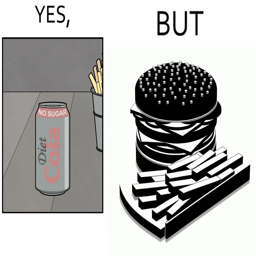

The image is funny because it features a hamburger with a bunch of French fries on top of it, and the fries are represented by a series of piano keys. This creative and unexpected combination of elements, which is not commonly seen in everyday life, makes the image amusing and visually interesting. The idea of a musical instrument being used to depict a food item, such as fries, is a playful and unconventional representation that evokes humor and curiosity.


In [8]:
import random, json
from PIL import Image
import os

outputfile = "outputs/annotations/third_round/whyfunny/llava-whyfunny.json"
with open(outputfile, "r") as f:
    outputs = json.load(f)

image_path = random.choice(list(outputs.keys()))
output = outputs[image_path]
#assert ("left" in outputfile) == ("YES" in image_path)
display(Image.open(os.path.join("yesbut_third_round",image_path)).convert('RGB').resize((256,256)))
print(output)

# Completion stats

In [17]:
import json
with open("completion_groundtruth.json", "r") as f:
    gt = json.load(f)
with open("outputs/completion/llava-cot-full.json", "r") as f:
    real = json.load(f)
    
def clean_value(value):
    """Clean the prediction or ground truth value."""
    value = value.strip().replace('"', '')  # Strip spaces and quotes
    if len(value) >= 2:
        if value[-3] in ["A", "B"]:
            value = value[-3]
        elif value[-2] in ["A", "B"]:
            value = value[-2]  # Take the pred[-2] character if length > 3
        elif value[-1] in ["A", "B"]:
            value = value[-1]
    return value

def evaluate_performance(preds, ground_truths):

    # Initialize counters for true positives, false positives, true negatives, and false negatives
    tp, fp, tn, fn = 0, 0, 0, 0

    for key in preds:
        if not preds[key]:
            continue
        pred = clean_value(preds[key])
        true = clean_value(ground_truths[key])
        
        if pred == 'A' and true == 'A':
            tp += 1
        elif pred == 'A' and true == 'B':
            fp += 1
        elif pred == 'B' and true == 'B':
            tn += 1
        elif pred == 'B' and true == 'A':
            fn += 1

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precisionA = tp / (tp + fp) if (tp + fp) > 0 else 0
    precisionB = tn / (tn + fn) if (tn + fn) > 0 else 0
    recallA = tp / (tp + fn) if (tp + fn) > 0 else 0
    recallB = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1A = 2 * (precisionA * recallA) / (precisionA + recallA) if (precisionA + recallA) > 0 else 0
    f1B = 2 * (precisionB * recallB) / (precisionB + recallB) if (precisionB + recallB) > 0 else 0

    macro_avg_precision = (precisionA+precisionB)/2
    weighted_avg_precision = (precisionA*(tp+fn)+precisionB*(tn+fp))/(tp+fp+tn+fn)

    macro_avg_recall = (recallA+recallB)/2
    weighted_avg_recall = (recallA*(tp+fn)+recallB*(tn+fp))/(tp+fp+tn+fn)  # should be same as accuracy

    macro_avg_f1 = (f1A+f1B)/2
    weighted_avg_f1 = (f1A*(tp+fn)+f1B*(tn+fp))/(tp+fp+tn+fn)
    
    # Print out the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"A/B: {tp+fp}/{tn+fn}")
    print(f"Precision : (A): {precisionA:.4f}, (B): {precisionB:.4f}, (macro): {macro_avg_precision:.4f}, (weighted): {weighted_avg_precision:.4f}")
    print(f"Recall : (A): {recallA:.4f}, (B): {recallB:.4f}, (macro): {macro_avg_recall:.4f}, (weighted): {weighted_avg_recall:.4f}")
    print(f"F1 Score : (A): {f1A:.4f}, (B): {f1B:.4f}, (macro): {macro_avg_recall:.4f}, (wieghted): {weighted_avg_f1:.4f}")

# Example usage
#preds = {"1": " A", "2": "\"B\"", "3": "CAB", "4": " BA "}
#ground_truths = {"1": "A", "2": "B", "3": "A", "4": "B"}

evaluate_performance(real, gt)

Accuracy: 0.5655
A/B: 58/87
Precision : (A): 0.4483, (B): 0.6437, (macro): 0.5460, (weighted): 0.5669
Recall : (A): 0.4561, (B): 0.6364, (macro): 0.5463, (weighted): 0.5655
F1 Score : (A): 0.4522, (B): 0.6400, (macro): 0.5463, (wieghted): 0.5662


In [ ]:
print(set(real.values()))
stats = {True: {"A": 0, "B": 0}, False: {"A": 0, "B": 0}}
for file,pred in real.items():
    pred = pred.strip('"')
    stats[pred==gt[file]][pred]+=1

print(stats)
nA_gt = sum(1 for r in gt.values() if r=="A")
print(f"gt A,B: {nA_gt, len(gt)-nA_gt}")
print(f"pred A,B: {sum(1 for r in real.values() if r=='A'), len(gt)-sum(1 for r in real.values() if r=='A')}")
print(f"accuracy: {sum(stats[True].values())/sum(sum(v.values()) for v in stats.values())}")
print(f"recallA: {stats[True]['A']/nA_gt}")
print(f"recallB: {stats[True]['B']/(len(gt)-nA_gt)}")

In [46]:
92/(92+58)

0.6133333333333333

## GPT4-Vision
### Zero shot
- (A,B) = (26, 124)
- Accuracy: 0.5867
- Precision : (A): 0.4231, (B): 0.6210, (macro): 0.5220, (weighted): 0.5444
- Recall : (A): 0.1897, (B): 0.8370, (macro): 0.5133, (weighted): 0.5867
- F1 Score : (A): 0.2619, (B): 0.7130, (macro): 0.5133, (wieghted): 0.5386

### COT
- (A,B) = (16, 134)
- Accuracy: 0.5733
- Precision : (A): 0.3125, (B): 0.6045, (macro): 0.4585, (weighted): 0.4916
- Recall : (A): 0.0862, (B): 0.8804, (macro): 0.4833, (weighted): 0.5733
- F1 Score : (A): 0.1351, (B): 0.7168, (macro): 0.4833, (wieghted): 0.4919

## Gemini
### Zero Shot
prompt = '''You are an AI expert in creating humour or satire. User gives you an image, and you have to make a choice "A" or "B".
###Instructions: The image is a 2x2 table with the labels "yes" (top left), "but" (top right), "A" (bottom left), and "B" (bottom right). Either the "yes" cell or the "but" cell will have a question mark in it. Your job is to replace the question mark with either cell "A" or cell "B" so that the resulting [yes,but] pair is funny or satirical. Make a choice  "A" or "B":
###Output format: one character, exactly either "A" or "B"'''
- Accuracy: 0.6111
- A/B: 37/107
- Precision : (A): 0.4595, (B): 0.6636, (macro): 0.5615, (weighted): 0.5884
- Recall : (A): 0.3208, (B): 0.7802, (macro): 0.5505, (weighted): 0.6111
- F1 Score : (A): 0.3778, (B): 0.7172, (macro): 0.5505, (wieghted): 0.5923

### COT
prompt = '''You are an AI expert in creating humour or satire. User gives you an image, and you have to make a choice "A" or "B".
###Instructions: The image is a 2x2 table with the labels "yes" (top left), "but" (top right), "A" (bottom left), and "B" (bottom right). Either the "yes" cell or the "but" cell will have a question mark in it. Your job is to replace the question mark with either cell "A" or cell "B" so that the resulting [yes,but] pair is funny or satirical. Make a choice  "A" or "B":
###Output format:
"If question mark is replaced by option A, the image <will/will not> be funny because <one sentence>.
If question mark is replaced by option B, the image <will/will not> be funny because <one sentence>.
Hence, option <answer> is more funny and the answer is <answer>", where <answer> is either A or B'''

- Accuracy: 0.6181
- A/B: 14/130
- Precision : (A): 0.4286, (B): 0.6385, (macro): 0.5335, (weighted): 0.5612
- Recall : (A): 0.1132, (B): 0.9121, (macro): 0.5126, (weighted): 0.6181
- F1 Score : (A): 0.1791, (B): 0.7511, (macro): 0.5126, (wieghted): 0.5406

## LLaVa
### Zero Shot
- Accuracy: 0.5133
- A/B: 67/83
- Precision : (A): 0.3881, (B): 0.6145, (macro): 0.5013, (weighted): 0.5269
- Recall : (A): 0.4483, (B): 0.5543, (macro): 0.5013, (weighted): 0.5133
- F1 Score : (A): 0.4160, (B): 0.5829, (macro): 0.5013, (wieghted): 0.5183

### COT
prompt = "Choose the correct option from A (bottom left) or B (bottom right), so that when the question mark is replaced by this option, the resulting top row is funny/satirical"
nudge 1 = "Lets think step by step. There are 4 quadrants - top left, top right, bottom left (A) and bottom right (B). The top left image consists of "
nudge 2 = ". Hence the correct option out of [A]/[B] is ["
- Accuracy: 0.5655
- A/B: 58/87
- Precision : (A): 0.4483, (B): 0.6437, (macro): 0.5460, (weighted): 0.5669
- Recall : (A): 0.4561, (B): 0.6364, (macro): 0.5463, (weighted): 0.5655
- F1 Score : (A): 0.4522, (B): 0.6400, (macro): 0.5463, (wieghted): 0.5662


# Detection Stats

In [7]:
import json

outfile = "outputs/detection/gpt4-vision-cot.json"
with open(outfile, "r") as f:
    outputs = json.load(f)

def get_pred(current_model, output):
    if "llava-cot" in current_model:
        return output["pred"][0]
    if "llava" in current_model:
        return output[0]
    if "gemini" in current_model:
        if not output:
            return ""
        return output.strip(' .')[-1]
    if "gpt4-vision-cot" in current_model:
        if not output:
            return ""
        return output[-2]
    if "gpt" in current_model:
        if not output:
            return ""
        return output[0]

def is_correct(pred, folder):
    if not pred:
        return False
    return (pred=="Y" and "negative" not in folder) or (pred=="N" and "negative" in folder)

def calculate_stats(output_json):
    bad = []
    ty, fy, tn, fn = 0,0,0,0
    correct = 0
    for filepath, output in output_json.items():
        pred = get_pred(outfile, output)
        if pred not in ["Y", "N"]:
            bad.append(output)
            continue
        if pred=="Y" and is_correct(pred, filepath.split('/')[0]):
            ty+=1
            continue
        if pred=="Y":
            fy+=1
        if pred=="N" and is_correct(pred, filepath.split('/')[0]):
            tn+=1
            continue
        if pred=="N":
            fn+=1
    print("bad: ", len(bad))
    #print(bad[0])

    assert ty+fy+tn+fn+len(bad)==len(output_json)
    accuracy = (ty+tn)/(ty+tn+fy+fn)
    
    precision_y = ty/(ty+fy)
    precision_n = tn/(tn+fn)
    precision_macro = (precision_y+precision_n)/2
    precision_weighted = (precision_y*(ty+fn)+precision_n*(tn+fy))/(ty+tn+fy+fn)
    
    recall_y = ty/(ty+fn)
    recall_n = tn/(tn+fy) if tn+fy>0 else 0
    recall_macro = (recall_n+recall_y)/2
    recall_weighted = (recall_y*(ty+fn)+recall_n*(tn+fy))/(ty+tn+fy+fn)

    def f1(p,r):
        return 2*p*r/(p+r) if p+r>0 else 0
    f1_y = f1(precision_y, recall_y)
    f1_n  = f1(precision_n, recall_n)
    f1_macro = (f1_y+f1_n)/2
    f1_weighted = (f1_y*(ty+fn)+f1_n*(tn+fy))/(ty+tn+fy+fn)

    
    return {"precision": [precision_y, precision_n, precision_macro, precision_weighted],
            "recall": [recall_y, recall_n, recall_macro, recall_weighted],
            "f1": [f1_y, f1_n, f1_macro, f1_weighted],
            "accuracy": accuracy,
            "y%": (ty+fy)/(ty+fy+tn+fn)
           }


for source_folder in ["images", "second", "third"]:
    filtered_outputs = {x:y for x,y in outputs.items() if source_folder in x}
    print(f"#### Round: {source_folder}, total: {len(filtered_outputs)}")
    print(calculate_stats(filtered_outputs))
print("#### Overall total: 2547")
print(calculate_stats(outputs))

#### Round: images, total: 283
bad:  0
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.9929328621908127, 0, 0.49646643109540634, 0.9929328621908127], 'f1': [0.9964539007092198, 0, 0.4982269503546099, 0.9964539007092197], 'accuracy': 0.9929328621908127, 'y%': 0.9929328621908127}
#### Round: second, total: 849
bad:  1
{'precision': [0.37548387096774194, 0.8493150684931506, 0.6123994697304462, 0.6805685806951867], 'recall': [0.9635761589403974, 0.11355311355311355, 0.5385646362467554, 0.41627358490566035], 'f1': [0.5403899721448467, 0.20032310177705978, 0.3703565369609533, 0.32143182212030463], 'accuracy': 0.41627358490566035, 'y%': 0.9139150943396226}
#### Round: third, total: 1415
bad:  1
{'precision': [0.3689795918367347, 0.7566137566137566, 0.5627966742252457, 0.6200919644928535], 'recall': [0.9076305220883534, 0.15611353711790393, 0.5318720296031286, 0.4207920792079208], 'f1': [0.5246662797446314, 0.2588235294117647, 0.39174490457819805, 0.3524513155968903], 'accuracy': 0.4207920792

## Llava

### Zero shot
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.254416961130742, 0, 0.127208480565371, 0.254416961130742], 'f1': [0.40563380281690137, 0, 0.20281690140845068, 0.40563380281690137], 'accuracy': 0.254416961130742, 'y%': 0.254416961130742}
#### Round: second, total: 849
{'precision': [0.34210526315789475, 0.6392914653784219, 0.49069836426815827, 0.5335785877923215], 'recall': [0.2582781456953642, 0.7257769652650823, 0.49202755548022326, 0.5594817432273262], 'f1': [0.2943396226415095, 0.6797945205479452, 0.48706707159472734, 0.5426833554504852], 'accuracy': 0.5594817432273262, 'y%': 0.26855123674911663}
#### Round: third, total: 1415
{'precision': [0.36885245901639346, 0.6530028598665396, 0.5109276594414666, 0.5527971708034846], 'recall': [0.27054108216432865, 0.7478165938864629, 0.5091788380253958, 0.5795053003533569], 'f1': [0.31213872832369943, 0.6972010178117048, 0.5046698730677022, 0.5614087333915532], 'accuracy': 0.5795053003533569, 'y%': 0.25865724381625443}
#### Overall total: 2547
{'precision': [0.42792792792792794, 0.5752259436469963, 0.5015769357874621, 0.5125360932192499], 'recall': [0.2629151291512915, 0.7395762132604238, 0.5012456712058576, 0.5367098547310561], 'f1': [0.32571428571428573, 0.6471291866028708, 0.48642173615857826, 0.5103354086039599], 'accuracy': 0.5367098547310561, 'y%': 0.26148409893992935}

### COT
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.30742049469964666, 0, 0.15371024734982333, 0.30742049469964666], 'f1': [0.4702702702702703, 0, 0.23513513513513515, 0.47027027027027035], 'accuracy': 0.30742049469964666, 'y%': 0.30742049469964666}
#### Round: second, total: 849
{'precision': [0.2825112107623318, 0.6182108626198083, 0.4503610366910701, 0.49879826561043505], 'recall': [0.20860927152317882, 0.7074954296160878, 0.45805235056963334, 0.5300353356890459], 'f1': [0.24, 0.659846547314578, 0.449923273657289, 0.5105018390825373], 'accuracy': 0.5300353356890459, 'y%': 0.2626619552414605}
#### Round: third, total: 1415
{'precision': [0.3217391304347826, 0.6373831775700934, 0.47956115400243804, 0.5260712485803266], 'recall': [0.22244488977955912, 0.7445414847161572, 0.48349318724785817, 0.5604240282685512], 'f1': [0.2630331753554502, 0.6868076535750252, 0.4749204144652377, 0.5373635089590761], 'accuracy': 0.5604240282685512, 'y%': 0.24381625441696114}
#### Overall total: 2547
{'precision': [0.3984732824427481, 0.5650105708245243, 0.48174192663363624, 0.4941325101233679], 'recall': [0.24077490774907748, 0.7306903622693096, 0.48573263500919356, 0.5221829603455045], 'f1': [0.30017251293847036, 0.6372578241430701, 0.4687151685407702, 0.4937947392016543], 'accuracy': 0.5221829603455045, 'y%': 0.2571652925009815}


## Gemini

### Zero Shot
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.9244604316546763, 0, 0.46223021582733814, 0.9244604316546763], 'f1': [0.9607476635514018, 0, 0.4803738317757009, 0.960747663551402], 'accuracy': 0.9244604316546763, 'y%': 0.9244604316546763}
#### Round: second, total: 849
{'precision': [0.3962558502340094, 0.7578947368421053, 0.5770752935380573, 0.6273391821099407], 'recall': [0.8466666666666667, 0.2711864406779661, 0.5589265536723164, 0.4789410348977136], 'f1': [0.5398512221041445, 0.39944521497919555, 0.46964821854167005, 0.45013330419397857], 'accuracy': 0.4789410348977136, 'y%': 0.7713598074608905}
#### Round: third, total: 1415
{'precision': [0.3686165273909007, 0.7029702970297029, 0.5357934122103019, 0.5849773362948502], 'recall': [0.8151950718685832, 0.23852183650615902, 0.5268584541873711, 0.4420289855072464], 'f1': [0.5076726342710999, 0.3561872909698997, 0.43192996262049976, 0.40964624907691743], 'accuracy': 0.4420289855072464, 'y%': 0.7804347826086957}
#### Overall total: 2547
{'precision': [0.45974683544303796, 0.6945525291828794, 0.5771496823129587, 0.5940832387718986], 'recall': [0.8525821596244132, 0.25070224719101125, 0.5516422034077122, 0.5082362394535959], 'f1': [0.5973684210526315, 0.368421052631579, 0.48289473684210527, 0.46638366708253154], 'accuracy': 0.5082362394535959, 'y%': 0.7934913619927682}


### COT
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.9671532846715328, 0, 0.4835766423357664, 0.9671532846715328], 'f1': [0.9833024118738405, 0, 0.49165120593692024, 0.9833024118738405], 'accuracy': 0.9671532846715328, 'y%': 0.9671532846715328}
#### Round: second, total: 849
{'precision': [0.3771353482260184, 0.8620689655172413, 0.6196021568716299, 0.6873981265661904], 'recall': [0.9728813559322034, 0.09541984732824428, 0.5341506016302239, 0.41147741147741146], 'f1': [0.5435606060606061, 0.17182130584192443, 0.35769095595126527, 0.3057200769829636], 'accuracy': 0.41147741147741146, 'y%': 0.9291819291819292}
#### Round: third, total: 1415
{'precision': [0.3613109512390088, 0.71875, 0.5400304756195045, 0.5922596042093085], 'recall': [0.9262295081967213, 0.10325476992143659, 0.514742139059079, 0.3944887599709935], 'f1': [0.5198389879240942, 0.18056918547595682, 0.3502040867000255, 0.3006298552328031], 'accuracy': 0.3944887599709935, 'y%': 0.9071791153009428}
#### Overall total: 2547
{'precision': [0.4409310496267018, 0.7282051282051282, 0.584568088915915, 0.605369893149547], 'recall': [0.9498580889309366, 0.10035335689045936, 0.525105722910698, 0.46359223300970875], 'f1': [0.6022795440911817, 0.17639751552795033, 0.389338529809566, 0.35849998486101486], 'accuracy': 0.46359223300970875, 'y%': 0.9211165048543689}

## GPT4 Vision

### Zero Shot
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.9257950530035336, 0, 0.4628975265017668, 0.9257950530035336], 'f1': [0.9614678899082569, 0, 0.48073394495412847, 0.961467889908257], 'accuracy': 0.9257950530035336, 'y%': 0.9257950530035336}
#### Round: second, total: 849
{'precision': [0.3889845094664372, 0.7153558052434457, 0.5521701573549415, 0.5991245183039922], 'recall': [0.7483443708609272, 0.3498168498168498, 0.5490806103388886, 0.49174528301886794], 'f1': [0.5118912797281994, 0.4698646986469865, 0.49087798918759296, 0.48483171219241844], 'accuracy': 0.49174528301886794, 'y%': 0.6851415094339622}
#### Round: third, total: 1415
{'precision': [0.3891566265060241, 0.7003424657534246, 0.5447495461297244, 0.5907451899788805], 'recall': [0.6485943775100401, 0.4465065502183406, 0.5475504638641904, 0.5176803394625177], 'f1': [0.4864457831325302, 0.5453333333333333, 0.5158895582329317, 0.5245935879302216], 'accuracy': 0.5176803394625177, 'y%': 0.5869872701555869}
#### Overall total: 2547
{'precision': [0.4847579199043634, 0.6880733944954128, 0.5864156571998881, 0.6015544715161961], 'recall': [0.7488457987072945, 0.4103967168262654, 0.57962125776678, 0.5544204322200393], 'f1': [0.5885341074020319, 0.5141388174807198, 0.5513364624413759, 0.5457970096161937], 'accuracy': 0.5544204322200393, 'y%': 0.6573673870333988}

### COT
#### Round: images, total: 283
{'precision': [1.0, 0.0, 0.5, 1.0], 'recall': [0.9929328621908127, 0, 0.49646643109540634, 0.9929328621908127], 'f1': [0.9964539007092198, 0, 0.4982269503546099, 0.9964539007092197], 'accuracy': 0.9929328621908127, 'y%': 0.9929328621908127}
#### Round: second, total: 849
{'precision': [0.37548387096774194, 0.8493150684931506, 0.6123994697304462, 0.6805685806951867], 'recall': [0.9635761589403974, 0.11355311355311355, 0.5385646362467554, 0.41627358490566035], 'f1': [0.5403899721448467, 0.20032310177705978, 0.3703565369609533, 0.32143182212030463], 'accuracy': 0.41627358490566035, 'y%': 0.9139150943396226}
#### Round: third, total: 1415
{'precision': [0.3689795918367347, 0.7566137566137566, 0.5627966742252457, 0.6200919644928535], 'recall': [0.9076305220883534, 0.15611353711790393, 0.5318720296031286, 0.4207920792079208], 'f1': [0.5246662797446314, 0.2588235294117647, 0.39174490457819805, 0.3524513155968903], 'accuracy': 0.4207920792079208, 'y%': 0.8663366336633663}
#### Overall total: 2547
{'precision': [0.448925909688733, 0.7765151515151515, 0.6127205306019423, 0.6371127354452061], 'recall': [0.9455216989843028, 0.140218878248974, 0.5428702886166384, 0.48290766208251473], 'f1': [0.6087990487514863, 0.23754345307068364, 0.423171250911085, 0.3955276613702158], 'accuracy': 0.48290766208251473, 'y%': 0.8962671905697446}
